<a href="https://colab.research.google.com/github/Gerlan-Ferreira/ExerciciosCienciaDados/blob/main/Ex_01_classificacao_e_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerando Modelo de Machine Learning (Classificação)

In [ ]:
# Autores: Gerlan Ferreira, Matheus Araújo e Gustavo Belmont.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
dados_limitecredito_treino = pd.read_csv("/content/drive/MyDrive/Dados Ciencia De Dados/dados_limitecredito.csv", encoding="utf-8")

In [ ]:
dados_limitecredito_treino.head()

,ID,historico_credito,divida,garantias,renda,Risco
0,1,1,2,1,10000,3
1,2,2,2,1,28000,3
2,3,2,1,1,29000,2
3,4,2,1,1,38900,3
4,5,2,1,1,40000,1


In [ ]:
data_treino = np.array(dados_limitecredito_treino[['ID','historico_credito', 'divida', 'garantias', 'renda']])

data_classif = np.array(dados_limitecredito_treino['Risco'])

In [ ]:
dados_limitecredito_treino.shape

(14, 6)

In [ ]:
dados_limitecredito_treino.head(5)

,ID,historico_credito,divida,garantias,renda,Risco
0,1,1,2,1,10000,3
1,2,2,2,1,28000,3
2,3,2,1,1,29000,2
3,4,2,1,1,38900,3
4,5,2,1,1,40000,1


In [ ]:
dados_limitecredito_treino.tail(5)

,ID,historico_credito,divida,garantias,renda,Risco
9,10,3,2,2,45600,1
10,11,3,2,1,9000,3
11,12,3,2,1,20000,2
12,13,3,2,1,56709,1
13,14,1,2,1,23780,3


In [ ]:
def plot_corr(dados_limitecredito_treino, size=10):
    corr = dados_limitecredito_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

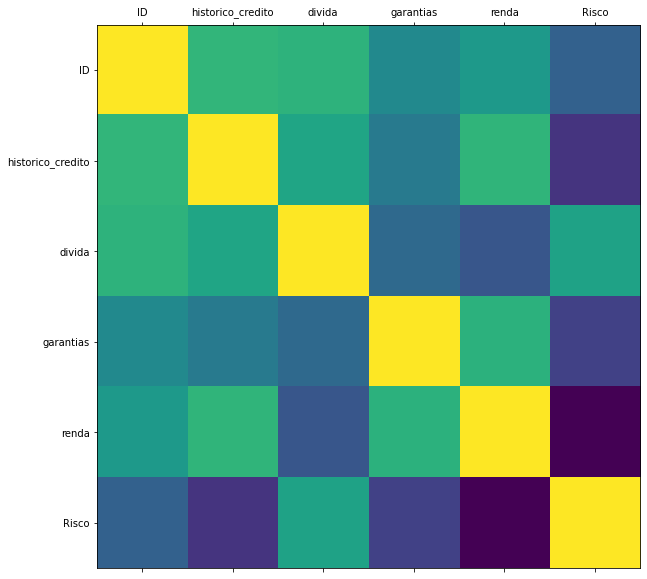

In [ ]:
plot_corr(dados_limitecredito_treino)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [ ]:
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [ ]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao/Teste")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[   14     1     2     1 23780]
 [    6     2     1     2 40000]
 [    3     2     1     1 29000]
 [    7     1     1     1 12000]
 [    2     2     2     1 28000]
 [   12     3     2     1 20000]
 [    8     1     1     2 43222]
 [   10     3     2     2 45600]
 [    1     1     2     1 10000]]
Conjunto de Validacao/Teste
[[    4     2     1     1 38900]
 [    9     3     1     1 56000]
 [   11     3     2     1  9000]
 [   13     3     2     1 56709]
 [    5     2     1     1 40000]]
-----------------------


In [ ]:
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_limitecredito_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_limitecredito_treino.index)) * 100))

64.29% nos dados de treino
35.71% nos dados de teste


In [ ]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino) 

GaussianNB()

In [ ]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print("{0:0.2f}%".format((accuracy_score(y_treino, y_pred_treino)) * 100))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
88.89%
Na Base de Treinamento


In [ ]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.0
na Base de Teste


In [ ]:
from sklearn import metrics

In [ ]:
import joblib

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[0 0]
 [0 0]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       3.0
           0       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Und

In [ ]:
joblib.dump(modelo_NB, 'modelo_limitecredito_MNB.pkl')

['modelo_limitecredito_MNB.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.0000



In [ ]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[0 0]
 [0 0]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       3.0
           0       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Und

In [ ]:
joblib.dump(modelo_v2, 'modelo_limitecredito_RandomForest.pkl')

['modelo_limitecredito_RandomForest.pkl']

In [ ]:
#Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [ ]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.6000

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           0       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#Persistência do modelo Regressão Logística no arquivo modelo_mamifero_RegressaoLogistica.pkl
joblib.dump(modelo_v3, 'modelo_limitecredito_RegressaoLogistica.pkl')

['modelo_limitecredito_RegressaoLogistica.pkl']